In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy  as np
import matplotlib.pyplot as plt
import skimage.io

from saliency.model import IttyKoch
from saliency import data

# 2.1 Sequential Fixation

In this section, the implementation of a sequential attention mechanism is demonstrated.

A simple strategy which will be implemented here is using the maximally attended spot within the current saliency map $S^{(t)}$ to direct the gaze, i.e.,

$$
f_{(t+1)} = \text{arg} \max_{i,j} S^{(t)},
$$

followed by 
$$
S^{(t+1)} = \mathcal{J} \odot S^{(t)}
$$


In [11]:
img = skimage.io.imread('data/imgs/balloons.png') / 255.

model = IttyKoch(top_down="peakiness", mapwidth=64, logtransform=False,
                 surround_sig = [2,8],
                 gabor_wavelength=5.,
                 center_bias=1.5)

S, chanmaps = model.predict(img, return_chanmaps=True)

processing


#### Plot the gaze trajectory

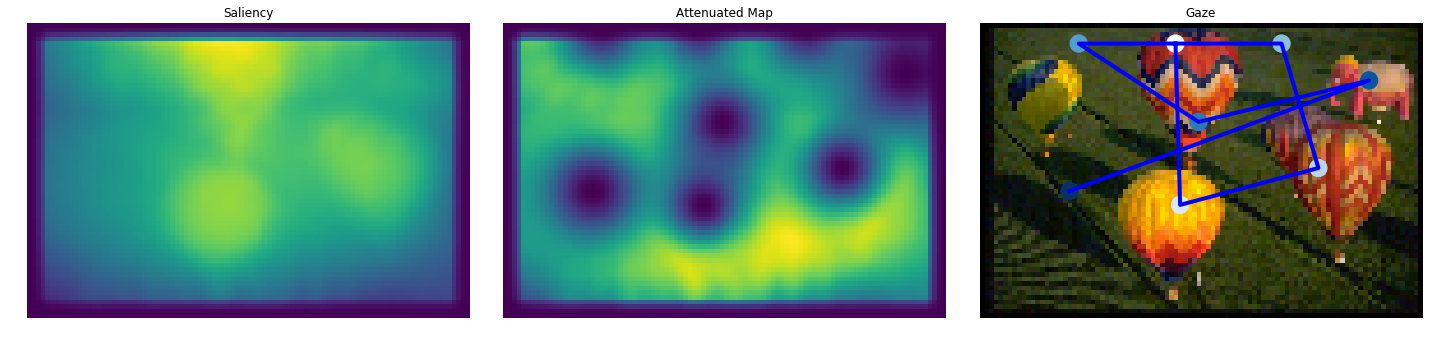

In [13]:
import saliency

salmap = saliency.saliency.attenuate_borders(S[...,np.newaxis], 5)[...,0]

salmap = np.exp(salmap)
salmap = (salmap - salmap.min()) / (salmap.max() - salmap.min())

fix, final = saliency.saliency.sequential_salicency(salmap, 8, 10)

fig, axes = plt.subplots(1,3,figsize=(20,8))

axes[2].imshow(saliency.saliency.resize(img, 64))
axes[2].plot(fix[:,1], fix[:,0], c="blue", linewidth=4, markersize=20)
axes[2].scatter(fix[:,1], fix[:,0], marker="o", cmap="Blues", c=np.arange(len(fix)), s=300)

axes[1].imshow(final)
axes[0].imshow(S)

for ax, title in zip(axes, ['Saliency', 'Attenuated Map', 'Gaze']):
    ax.axis("off")
    ax.set_title(title)

plt.tight_layout()
#plt.savefig("report/fig/sequence.pdf")
plt.show()